Final Tutorial

In [39]:
import os
import pandas as pd
import requests
from bs4 import BeautifulSoup
import spotipy
import numpy as np

Use xml files to scrape from spotify charts
for each track show their streams per day, maybe as an array or another dataframe
from there spotipy api can be used to observe the details of these songs

In [40]:
# Collect links from spotify charts top 200 streams per day
ref_str = "https://spotifycharts.com/regional/global/daily/"
ref_arr = []

# gets every day from janurary 2017 to October 2020

# for year in range(2017, 2021):
for year in range(2017, 2018):
    date = ""
    
    endingMonth = 12
    if year == 2020:
        endingMonth = 10
        
    # for month in range (1, endingMonth + 1):
    for month in range (1,2):
       
        dayCount = -1

        #gets proper day count per month
        thirtyDayCountMonths = [4, 6, 9, 11]
        if month == 2:
            dayCount = 29
        elif month in thirtyDayCountMonths:
            dayCount = 30
        else:
            dayCount = 31

        if int(month) < 10:
            month = "0" + str(month)
        for day in range (1, 16):
           
            if int(day) < 10:
                day = "0" + str(day)

            date = str(year) + "-" + str(month) + "-" + str(day) + "/download"
            date = ref_str + date
            ref_arr.append(date)

ref_arr

['https://spotifycharts.com/regional/global/daily/2017-01-01/download',
 'https://spotifycharts.com/regional/global/daily/2017-01-02/download',
 'https://spotifycharts.com/regional/global/daily/2017-01-03/download',
 'https://spotifycharts.com/regional/global/daily/2017-01-04/download',
 'https://spotifycharts.com/regional/global/daily/2017-01-05/download',
 'https://spotifycharts.com/regional/global/daily/2017-01-06/download',
 'https://spotifycharts.com/regional/global/daily/2017-01-07/download',
 'https://spotifycharts.com/regional/global/daily/2017-01-08/download',
 'https://spotifycharts.com/regional/global/daily/2017-01-09/download',
 'https://spotifycharts.com/regional/global/daily/2017-01-10/download',
 'https://spotifycharts.com/regional/global/daily/2017-01-11/download',
 'https://spotifycharts.com/regional/global/daily/2017-01-12/download',
 'https://spotifycharts.com/regional/global/daily/2017-01-13/download',
 'https://spotifycharts.com/regional/global/daily/2017-01-14/dow

In [41]:
#Loop downloading and appending of dataframes 

df = pd.DataFrame(columns =['position', 'track_name', 'artist', 'streams', 'url', 'date'] )
#make dir to save to
path = "sheets"
try:
    os.mkdir(path)
except OSError:
    print ("Folder already exists")

for i in ref_arr:
    r = requests.get(i, allow_redirects = True)
    #String manipulation to read from the correct csv files
    date = i[48:58]
    print(date)
    fileName = "regional-global-daily-" + date + ".csv"
    print(fileName)
    open(fileName, "wb").write(r.content)

    os.rename(fileName, "sheets/" + fileName)

    df_new = pd.read_csv(path + "/" + fileName)
    df_new.columns= ['position', 'track_name', 'artist', 'streams', 'url']
    df_new['date'] = date
    
    df_new = df_new.iloc[1:] #deletes junk row from csv conversion
    df = df.append(df_new)



df.drop(['position'], axis=1, inplace=True) #delete position row since rank alraedy has this information

2017-01-01
regional-global-daily-2017-01-01.csv
2017-01-02
regional-global-daily-2017-01-02.csv
2017-01-03
regional-global-daily-2017-01-03.csv
2017-01-04
regional-global-daily-2017-01-04.csv
2017-01-05
regional-global-daily-2017-01-05.csv
2017-01-06
regional-global-daily-2017-01-06.csv
2017-01-07
regional-global-daily-2017-01-07.csv
2017-01-08
regional-global-daily-2017-01-08.csv
2017-01-09
regional-global-daily-2017-01-09.csv
2017-01-10
regional-global-daily-2017-01-10.csv
2017-01-11
regional-global-daily-2017-01-11.csv
2017-01-12
regional-global-daily-2017-01-12.csv
2017-01-13
regional-global-daily-2017-01-13.csv
2017-01-14
regional-global-daily-2017-01-14.csv
2017-01-15
regional-global-daily-2017-01-15.csv


In [42]:
df

,track_name,artist,streams,url,date
1,Starboy,The Weeknd,3135625,https://open.spotify.com/track/5aAx2yezTd8zXrk...,2017-01-01
2,Closer,The Chainsmokers,3015525,https://open.spotify.com/track/7BKLCZ1jbUBVqRi...,2017-01-01
3,Let Me Love You,DJ Snake,2545384,https://open.spotify.com/track/4pdPtRcBmOSQDlJ...,2017-01-01
4,Rockabye (feat. Sean Paul & Anne-Marie),Clean Bandit,2356604,https://open.spotify.com/track/5knuzwU65gJK7IF...,2017-01-01
5,One Dance,Drake,2259887,https://open.spotify.com/track/1xznGGDReH1oQq0...,2017-01-01
...,...,...,...,...,...
196,You & Me,Marc E. Bassy,348357,https://open.spotify.com/track/4QdovcM8j50QPly...,2017-01-15
197,Can't Feel My Face,The Weeknd,347804,https://open.spotify.com/track/6RsWqX8zABZLhZy...,2017-01-15
198,White Iverson,Post Malone,342787,https://open.spotify.com/track/6eT7xZZlB2mwyzJ...,2017-01-15
199,Te Quiero Pa´Mi,Don Omar,342480,https://open.spotify.com/track/3BY2mafsbsoKGqS...,2017-01-15


In [77]:
import spotipy
from spotipy.oauth2 import SpotifyOAuth
from spotipy.oauth2 import SpotifyClientCredentials


SPOTIPY_CLIENT_ID="ea1a162fbc6f413990542b76ab82a168"
SPOTIPY_CLIENT_SECRET="a09882042ce54f158fdd2b6baaf2b26d"
SPOTIPY_CLIENT_REDIRECT="http://www.cs.umd.edu/class/fall2020/cmsc320-0201/"

scope = "user-library-read"

sp = spotipy.Spotify(auth_manager=SpotifyOAuth(scope=scope, client_id=SPOTIPY_CLIENT_ID, client_secret=SPOTIPY_CLIENT_SECRET, redirect_uri=SPOTIPY_CLIENT_REDIRECT))

results = sp.current_user_saved_tracks()


# How to get audio features of a track from our data frame

trackName = df.iloc[0].at['track_name']
trackNameWithoutSpaces = '+'.join(trackName.split())
print(trackNameWithoutSpaces)
trackItem = sp.search(trackNameWithoutSpaces, 1, 0)
track_id = trackItem['tracks']['items'][0]['id']
audiofeatures = sp.audio_features(track_id)
print(track_id)
audiofeatures[0]

Starboy
7MXVkk9YMctZqd1Srtv4MB


{'danceability': 0.679,
 'energy': 0.587,
 'key': 7,
 'loudness': -7.015,
 'mode': 1,
 'speechiness': 0.276,
 'acousticness': 0.141,
 'instrumentalness': 6.35e-06,
 'liveness': 0.137,
 'valence': 0.486,
 'tempo': 186.003,
 'type': 'audio_features',
 'id': '7MXVkk9YMctZqd1Srtv4MB',
 'uri': 'spotify:track:7MXVkk9YMctZqd1Srtv4MB',
 'track_href': 'https://api.spotify.com/v1/tracks/7MXVkk9YMctZqd1Srtv4MB',
 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/7MXVkk9YMctZqd1Srtv4MB',
 'duration_ms': 230453,
 'time_signature': 4}

In [44]:
#adding genre to datarame
#trackArtist = df.iloc[0].at['artist']
#trackArtistWithoutSpaces = '+'.join(trackArtist.split())
#print(trackArtistWithoutSpaces)
#result = sp.search(trackArtistWithoutSpaces)
#track = result['tracks']['items'][0]
#artist = sp.artist(track["artists"][0]["external_urls"]["spotify"])
#print("artist genres:", artist["genres"])

In [45]:
artist_genres = []

for index, row in df.iterrows():
    artist = row['artist']
    print(index)
    print(artist)
    trackArtistWithoutSpaces = '+'.join(artist.split())
    result = sp.search(trackArtistWithoutSpaces)
    track = result['tracks']['items'][0]
    artist = sp.artist(track["artists"][0]["external_urls"]["spotify"])
    artist_genres.append(artist["genres"])
    print(artist["genres"])


129
Calum Scott
['neo mellow', 'pop', 'viral pop']
130
JP Cooper
['acoustic pop', 'indie cafe pop', 'indiecoustica', 'neo mellow', 'neo-singer-songwriter', 'pop', 'pop rock', 'uk pop', 'viral pop']
131
Enrique Iglesias
['latin', 'reggaeton', 'reggaeton flow', 'trap latino']
132
Major Lazer
['dance pop', 'edm', 'electro house', 'moombahton', 'pop', 'pop dance', 'pop rap']
133
Rihanna
['barbadian pop', 'dance pop', 'pop', 'pop dance', 'pop rap', 'post-teen pop', 'r&b', 'urban contemporary']
134
Niall Horan
['dance pop', 'pop', 'post-teen pop']
135
MØ
['cali rap']
136
Jonas Blue
['dance pop', 'edm', 'pop', 'pop dance', 'tropical house', 'uk dance']
137
Adele
['british soul', 'pop', 'pop soul', 'uk pop']
138
Rae Sremmurd
['hip hop', 'melodic rap', 'mississippi hip hop', 'pop rap', 'rap', 'southern hip hop', 'trap']
139
Chance the Rapper
['canadian pop', 'pop', 'post-teen pop']
140
MC G15
['funk carioca', 'funk ostentacao', 'funk paulista']
141
Young Thug
['dance pop', 'pop', 'pop rap', 'r&

In [46]:
df['artist_genres'] = artist_genres
#print(df["artist_genres"])
def filt_func(genre_list):
    genre = ['pop','rap','edm','rock','indie']
    result = list(filter(lambda x: x in genre, genre_list))
    return "other" if len(result) == 0 else result[0]
    #print(result)
df['genre'] = df['artist_genres'].apply(lambda x: filt_func(x))
df['streams'] = df['streams'].apply(lambda x: int(x))

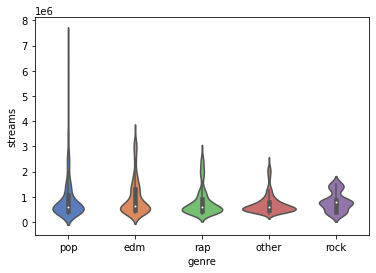

In [47]:
import seaborn as sns
ax = sns.violinplot(x='genre', y='streams', data=df, palette='muted')
#df.head()

In [48]:
#def get_artist_genres(data):
    #artist_no_space = '+'.join(data.split())
    #trackItem = sp.search(artist_no_space, 1, 0)
    #audiofeatures = sp.audio_features(trackItem['tracks']['items'][0]['id'])
    #print(data)
    #print(audiofeatures)
    #return 1
    #return artist["genres"]
#df['artist'].apply(lambda x: get_artist_genres(x))

In [107]:
audioFeaturesDf = pd.DataFrame(columns=["duration_ms", "key", "mode", "time_signature", "acousticness", "danceability", "energy", "instrumentalness", "liveness", "loudness", "speechiness", "valence", "tempo", "id", "uri", "track_href", "analysis_url", "type"])

#for index, row in df.iterrows():
trackName = df.iloc[0].at['track_name']
trackNameWithoutSpaces = '+'.join(trackName.split())
trackItem = sp.search(trackNameWithoutSpaces, 1, 0)
track_id = trackItem['tracks']['items'][0]['id']
audiofeatures = sp.audio_features(track_id)
print(track_id)
print(audio_features)
print(row['track_name'])
    

7MXVkk9YMctZqd1Srtv4MB
                                                   0
0  "duration_ms", "key", "mode", "time_signature"...
PILLOWTALK


In [109]:
for index, row in df.iterrows():
    trackName = df.iloc[index - 1].at['track_name']
    trackNameWithoutSpaces = '+'.join(trackName.split())
    print(trackNameWithoutSpaces)
    trackItem = sp.search(trackNameWithoutSpaces, 1, 0)
    #print(trackItem)
    if (len(trackItem['tracks']['items']) != 0):
        track_id = trackItem['tracks']['items'][0]['id']
        audiofeatures = sp.audio_features(track_id)[0]
        #print(track_id)
        #print(audiofeatures)
    else:
        audiofeatures = None
    audioFeaturesDf.append(audiofeatures, ignore_index=True, inplace=True)
audioFeaturesDf

Starboy
Closer
Let+Me+Love+You
Rockabye+(feat.+Sean+Paul+&+Anne-Marie)
One+Dance
Fake+Love
24K+Magic
Don't+Wanna+Know
Black+Beatles
I+Feel+It+Coming
Chantaje+(feat.+Maluma)
I+Don’t+Wanna+Live+Forever+(Fifty+Shades+Darker)+-+From+"Fifty+Shades+Darker+(Original+Motion+Picture+Soundtrack)"
Say+You+Won't+Let+Go
Bad+and+Boujee+(feat.+Lil+Uzi+Vert)
Cold+Water+(feat.+Justin+Bieber+&+MØ)
In+the+Name+of+Love
Side+To+Side
Call+On+Me+-+Ryan+Riback+Extended+Remix
CAN'T+STOP+THE+FEELING!+(Original+Song+from+DreamWorks+Animation's+"TROLLS")
Don't+Let+Me+Down+(feat.+Daya)


KeyboardInterrupt: 

In [110]:
audioFeaturesDf

,duration_ms,key,mode,time_signature,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo,id,uri,track_href,analysis_url,type
